# **SCENARIO**
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of
marketing, Moreno, believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your
team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will
design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your
recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# **IMPORTANT INFORMATION**

 * Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who
purchase annual memberships are Cyclistic members

* Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing
flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to
future growth.
* In order to do
that, we need to better understand how annual members and casual riders differ, why casual
riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

# **TASK**
Moreno (manager) has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?



In [54]:
#importing libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [55]:
#importing dataset
!gdown 16Kn2sBkwZdJIRJiUwLGDouQvXglZR0dh

Downloading...
From: https://drive.google.com/uc?id=16Kn2sBkwZdJIRJiUwLGDouQvXglZR0dh
To: /content/202311-divvy-tripdata.csv
100% 73.0M/73.0M [00:00<00:00, 73.9MB/s]


In [56]:
file = "/content/202311-divvy-tripdata.csv"
df = pd.read_csv(file)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:05,2023-11-30 22:13:27,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,-87.624082,41.949473,-87.646453,member
1,6322270563BF5470,electric_bike,2023-11-03 09:44:02,2023-11-03 10:17:15,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,-87.650035,41.952833,-87.649993,member
2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:44,2023-11-30 11:40:08,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,-87.628694,41.897448,-87.628722,member
3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:45,2023-11-08 10:27:05,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member
4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:25,2023-11-03 16:54:25,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member


# **PREPROCESSING**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362518 entries, 0 to 362517
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             362518 non-null  object 
 1   rideable_type       362518 non-null  object 
 2   started_at          362518 non-null  object 
 3   ended_at            362518 non-null  object 
 4   start_station_name  307515 non-null  object 
 5   start_station_id    307515 non-null  object 
 6   end_station_name    304619 non-null  object 
 7   end_station_id      304619 non-null  object 
 8   start_lat           362518 non-null  float64
 9   start_lng           362518 non-null  float64
 10  end_lat             362168 non-null  float64
 11  end_lng             362168 non-null  float64
 12  member_casual       362518 non-null  object 
dtypes: float64(4), object(9)
memory usage: 36.0+ MB


* Some variables appear to have missing values
* Some variables' type are not quite right, let's change it and also check the categories in it

In [58]:
df = df.astype({"rideable_type":"category","member_casual":"category","end_station_name":"category","end_station_id":"category","start_station_name":"category","start_station_id":"category"})
df['started_at']= pd.to_datetime(df['started_at'])
df['ended_at']= pd.to_datetime(df['ended_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362518 entries, 0 to 362517
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             362518 non-null  object        
 1   rideable_type       362518 non-null  category      
 2   started_at          362518 non-null  datetime64[ns]
 3   ended_at            362518 non-null  datetime64[ns]
 4   start_station_name  307515 non-null  category      
 5   start_station_id    307515 non-null  category      
 6   end_station_name    304619 non-null  category      
 7   end_station_id      304619 non-null  category      
 8   start_lat           362518 non-null  float64       
 9   start_lng           362518 non-null  float64       
 10  end_lat             362168 non-null  float64       
 11  end_lng             362168 non-null  float64       
 12  member_casual       362518 non-null  category      
dtypes: category(6), datetime64[ns

In [59]:
#let's check the percentage of missing values for each variables
(df.isnull().sum()/len(df)).to_frame('missing_value_percentage')

,missing_value_percentage
ride_id,0.000000
rideable_type,0.000000
started_at,0.000000
ended_at,0.000000
start_station_name,0.151725
start_station_id,0.151725
end_station_name,0.159713
end_station_id,0.159713
start_lat,0.000000
start_lng,0.000000


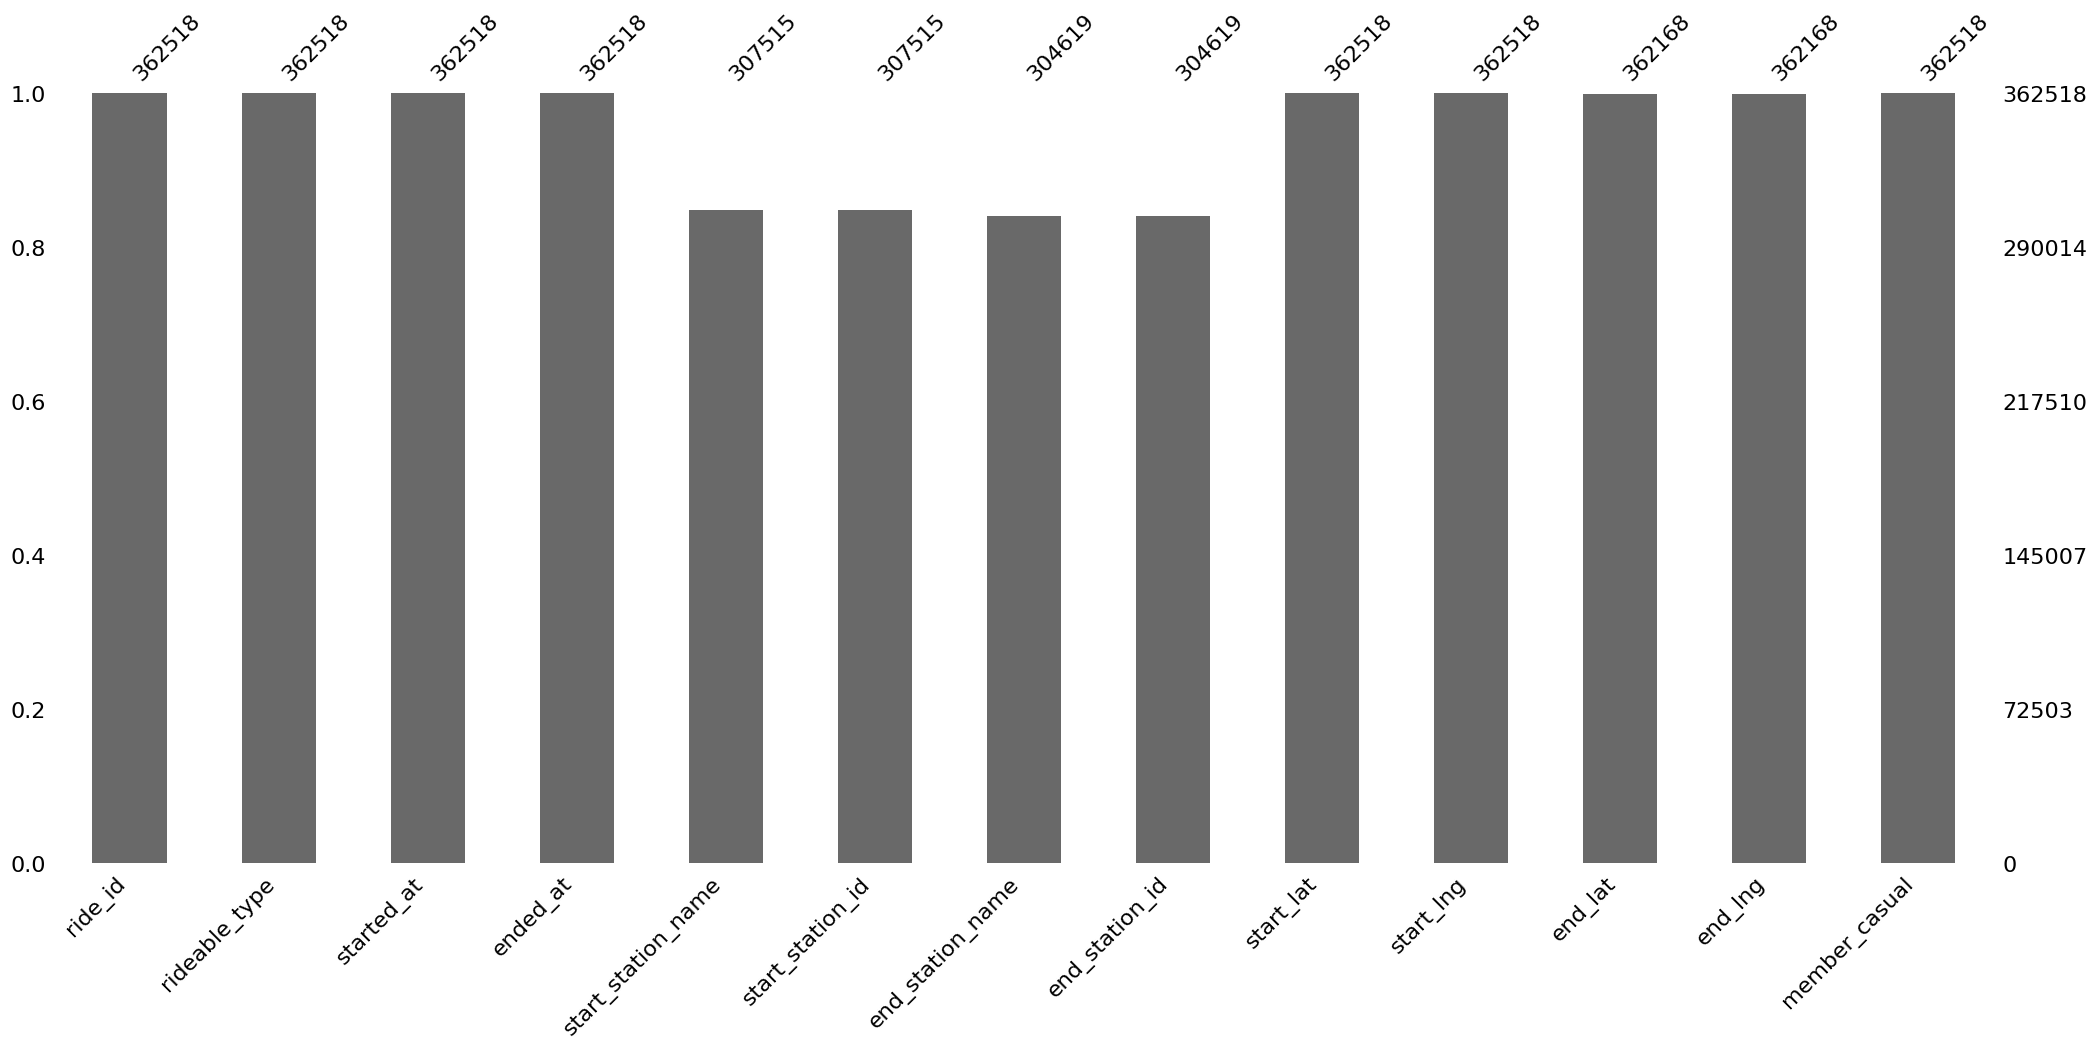

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    55003
start_station_id      55003
end_station_name      57899
end_station_id        57899
start_lat                 0
start_lng                 0
end_lat                 350
end_lng                 350
member_casual             0
dtype: int64

In [60]:
msno.bar(df)
plt.show()
df.isna().sum()

In [61]:
df[df.isnull().any(axis=1)]
 #the missing value is kinda high, it needs to be resolved first maybe by checking its latitude and longitude, but for now it's better to analyze the data without the missing values.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
134656,1BD2042C0D74B448,electric_bike,2023-11-14 21:16:09,2023-11-14 21:22:01,Pine Grove Ave & Waveland Ave,TA1307000150,NaN,NaN,41.949427,-87.646331,41.950000,-87.660000,member
134657,DA97B63616B4C411,electric_bike,2023-11-04 15:09:16,2023-11-04 15:19:35,Pine Grove Ave & Waveland Ave,TA1307000150,NaN,NaN,41.949330,-87.646314,41.940000,-87.670000,member
134658,90028890571F74FE,electric_bike,2023-11-22 10:37:27,2023-11-22 10:53:05,Broadway & Sheridan Rd,13323,NaN,NaN,41.952839,-87.649957,41.940000,-87.700000,member
134659,6A7F34404A485C6F,electric_bike,2023-11-22 13:31:42,2023-11-22 13:47:48,Pine Grove Ave & Waveland Ave,TA1307000150,NaN,NaN,41.949375,-87.646417,41.900000,-87.630000,member
134660,CB5758FC1EBB52B5,electric_bike,2023-11-09 15:02:19,2023-11-09 15:15:21,Pine Grove Ave & Waveland Ave,TA1307000150,NaN,NaN,41.949393,-87.646464,41.930000,-87.670000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361393,0ECD0634764A807C,electric_bike,2023-11-09 08:11:22,2023-11-09 08:20:39,NaN,NaN,Damen Ave & Madison St,13134,41.910000,-87.680000,41.881370,-87.674930,member
361398,C87482A2D6C8B6CF,electric_bike,2023-11-08 08:17:08,2023-11-08 08:20:19,NaN,NaN,900 W Harrison St,13028,41.870000,-87.660000,41.874754,-87.649807,member
361399,B4A36688AC371407,electric_bike,2023-11-07 15:37:22,2023-11-07 15:40:05,NaN,NaN,Ellis Ave & 60th St,KA1503000014,41.790000,-87.600000,41.785097,-87.601073,member
361400,91093CDC95D11D22,electric_bike,2023-11-05 16:48:27,2023-11-05 17:12:07,NaN,NaN,Damen Ave & Madison St,13134,41.930000,-87.640000,41.881370,-87.674930,member


In [62]:
#drop the missing values
df2 = df.copy()
df2.dropna(inplace=True)

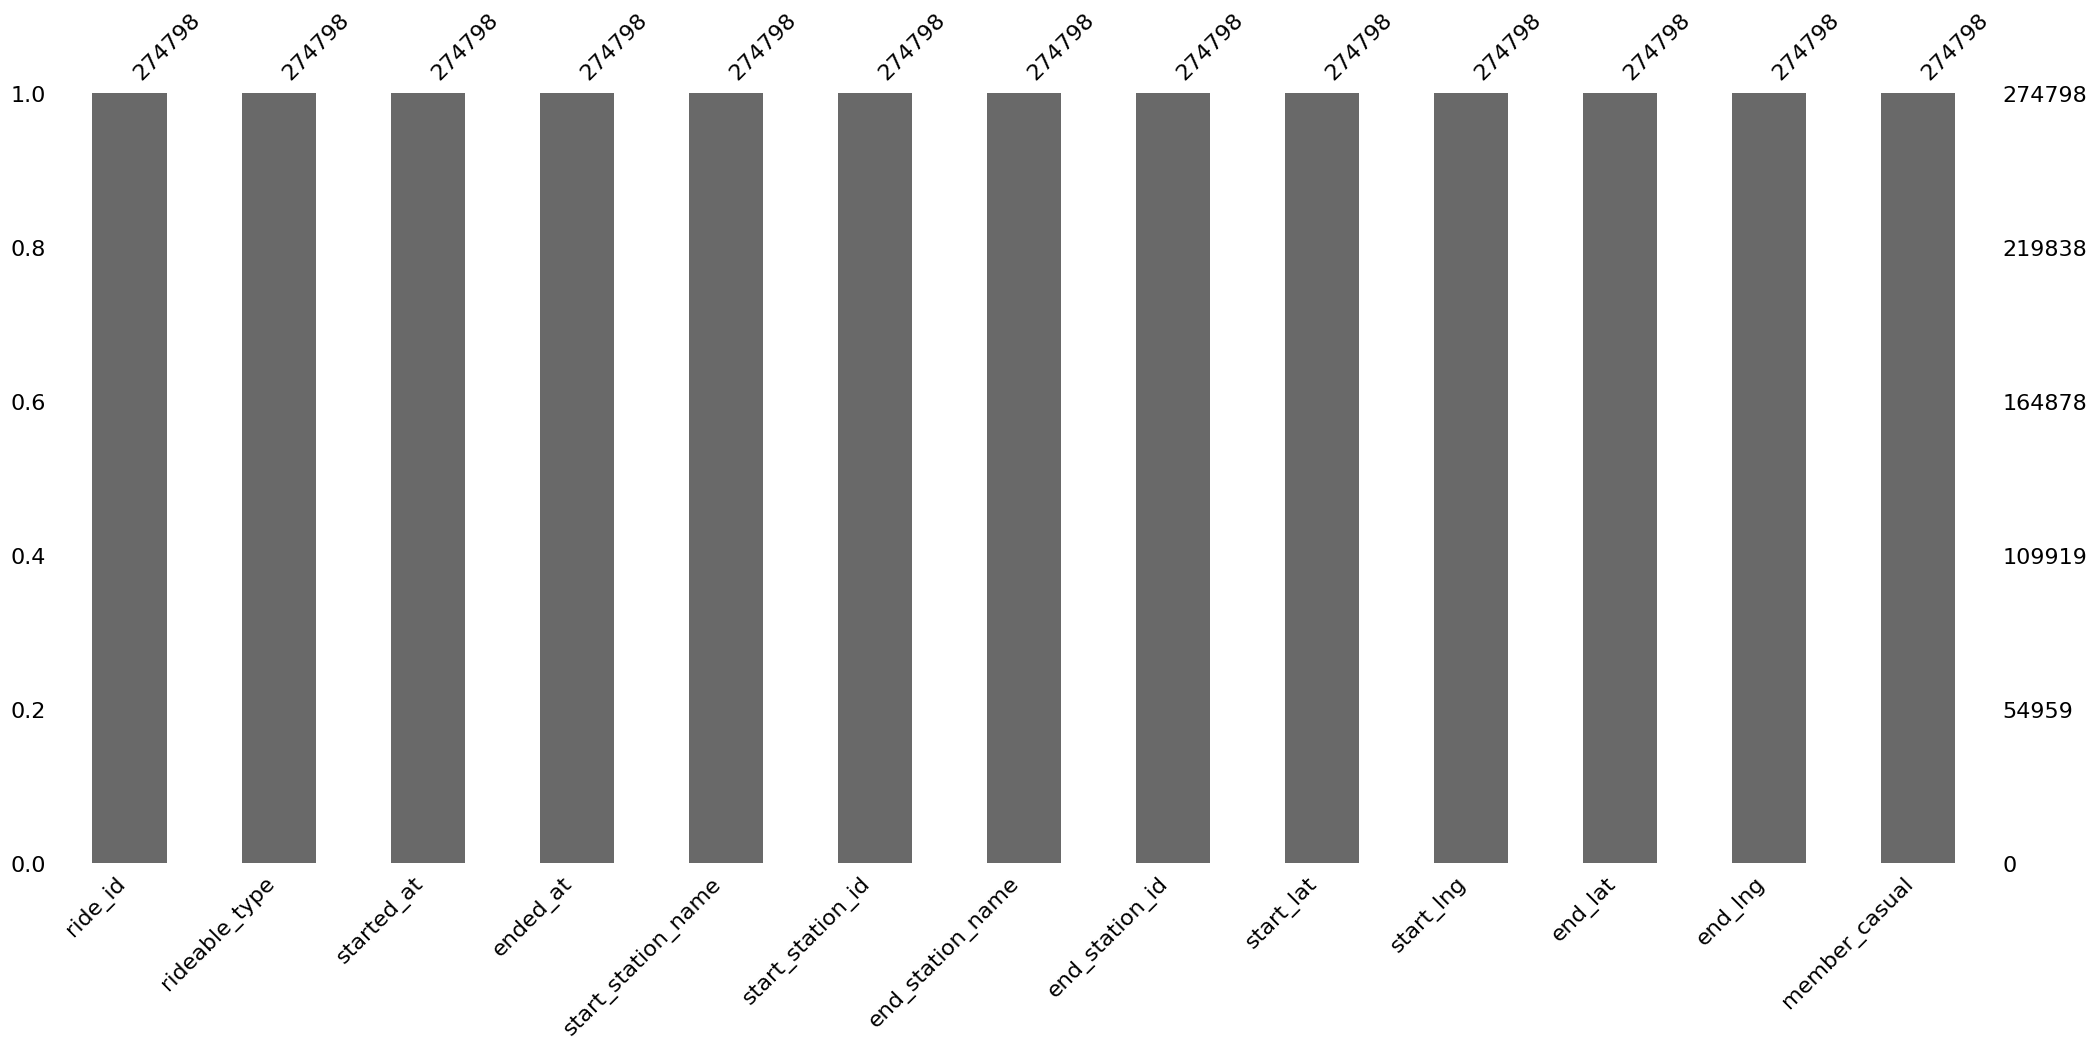

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [63]:
msno.bar(df2)
plt.show()
df2.isna().sum()

In [64]:
#cuplication checking
df2.duplicated().value_counts()

False    274798
dtype: int64

# **FEATURE ENGINEERING**

In [65]:
#make a new variable total ride time
df2["total_ride_time"] = df2["ended_at"] - df2["started_at"]

In [66]:
#make a new variable month
df2['month'] = df2['started_at'].dt.strftime('%B')

In [67]:
#make a new variable day
df2['day'] = df2['started_at'].dt.strftime('%A')

In [68]:
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_ride_time,month,day
0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:05,2023-11-30 22:13:27,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,-87.624082,41.949473,-87.646453,member,0 days 00:23:22,November,Thursday
1,6322270563BF5470,electric_bike,2023-11-03 09:44:02,2023-11-03 10:17:15,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,-87.650035,41.952833,-87.649993,member,0 days 00:33:13,November,Friday
2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:44,2023-11-30 11:40:08,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,-87.628694,41.897448,-87.628722,member,0 days 00:00:24,November,Thursday
3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:45,2023-11-08 10:27:05,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member,0 days 00:25:20,November,Wednesday
4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:25,2023-11-03 16:54:25,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member,0 days 00:34:00,November,Friday


# **EDA**

Some insights that can be gained:
* Which starting station is the most popular for casual riders and members?
* Which type of ride is used the most for casual riders and members?
* How long do casual riders and members use the bike for?
* Which day is the busiest for casual riders and members?

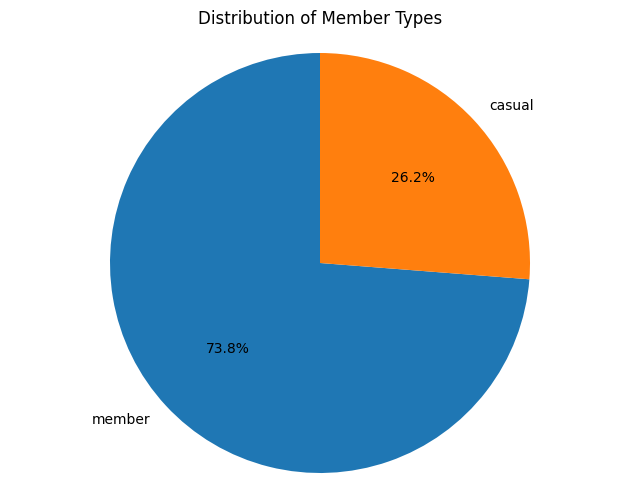

member    202701
casual     72097
Name: member_casual, dtype: int64


In [76]:
#first of all lets so how many casual riders and members
member_casual_counts = df2['member_casual'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(member_casual_counts, labels=member_casual_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Member Types')

# Show the plot
plt.axis('equal')
plt.show()
print(member_casual_counts)

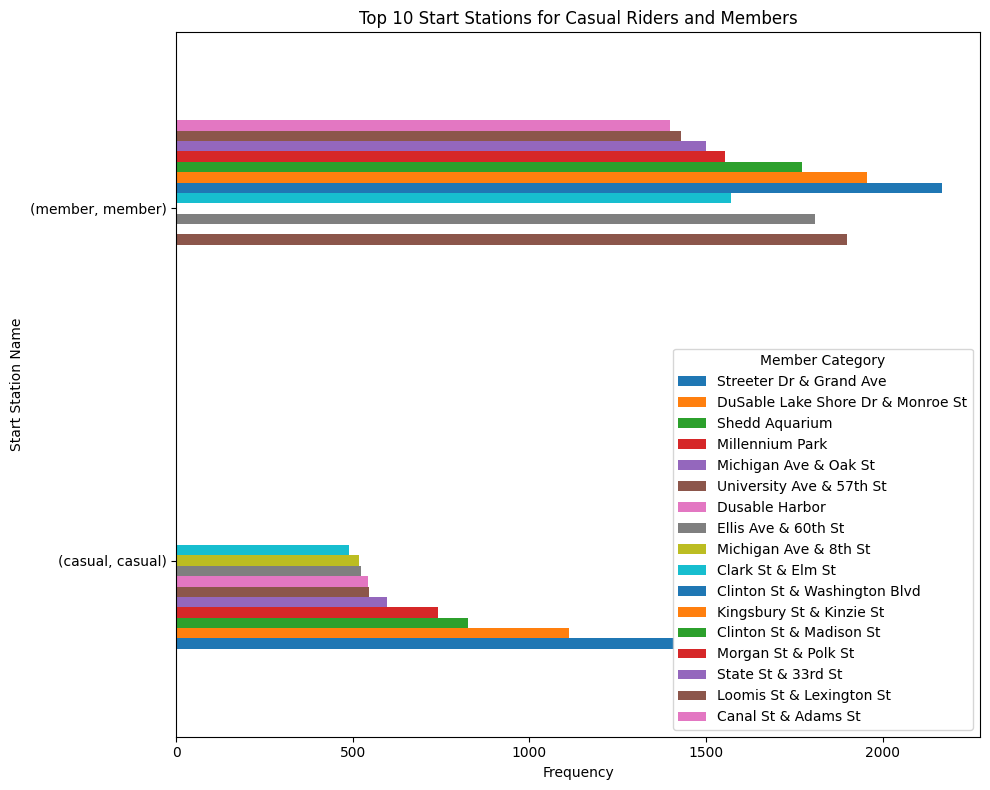

member_casual  member_casual  start_station_name               
casual         casual         Streeter Dr & Grand Ave              1410
                              DuSable Lake Shore Dr & Monroe St    1113
                              Shedd Aquarium                        825
                              Millennium Park                       740
                              Michigan Ave & Oak St                 598
                              University Ave & 57th St              545
                              Dusable Harbor                        542
                              Ellis Ave & 60th St                   522
                              Michigan Ave & 8th St                 517
                              Clark St & Elm St                     490
member         member         Clinton St & Washington Blvd         2167
                              Kingsbury St & Kinzie St             1956
                              University Ave & 57th St             1900


In [77]:
group_station = df2.groupby('member_casual')['start_station_name'].value_counts()

#get the 10 most popular stations
top_start_stations = group_station.groupby(level=0).nlargest(10)


unstacked1 = top_start_stations.unstack()

fig, ax = plt.subplots(figsize=(10, 8))
unstacked1.plot(kind='barh', ax=ax)
plt.xlabel('Frequency')
plt.ylabel('Start Station Name')
plt.title('Top 10 Start Stations for Casual Riders and Members')
plt.legend(title='Member Category')
plt.tight_layout()
plt.show()
print(top_start_stations)

The list for top 10 most popular starting station for casual riders and members is pretty different. Even though, some stations are present in casual riders and members. Also, The top 4 for casual riders has a high difference in frequency than the other 6.

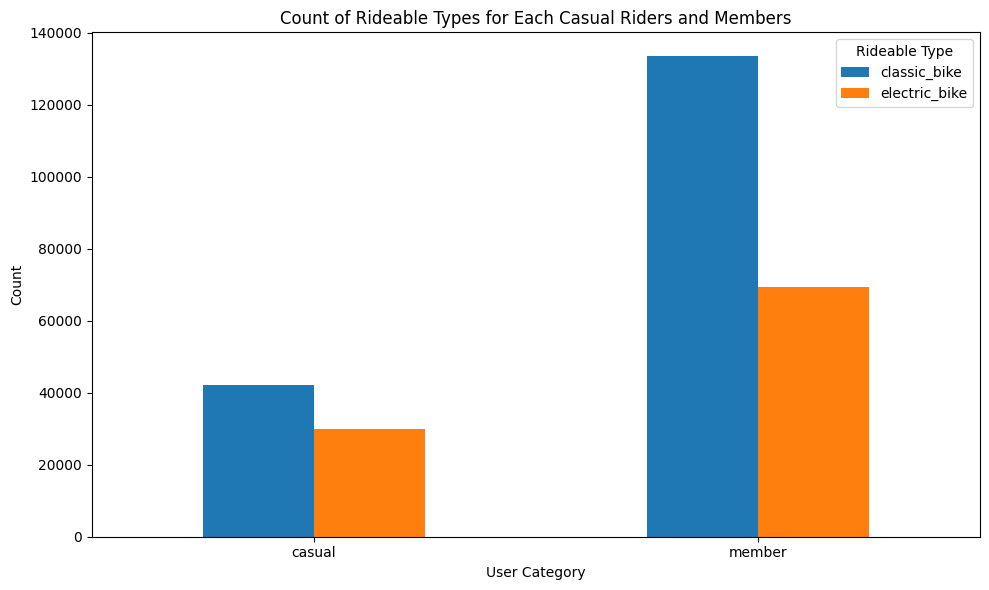

member_casual  rideable_type
casual         classic_bike      42260
               electric_bike     29837
member         classic_bike     133417
               electric_bike     69284
Name: rideable_type, dtype: int64


In [71]:
group_ride = df2.groupby('member_casual')['rideable_type'].value_counts()
unstacked_ride = group_ride.unstack()

fig, ax = plt.subplots(figsize=(10, 6))
unstacked_ride.plot(kind='bar', ax=ax)
plt.xlabel('User Category')
plt.ylabel('Count')
plt.title('Count of Rideable Types for Each Casual Riders and Members')
plt.legend(title='Rideable Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(group_ride)

For casual riders, classic bike is more preverable rather than the electric bike, the same goes to members.

In [72]:
df2.groupby('member_casual')['total_ride_time'].mean()

member_casual
casual   0 days 00:17:52.116842587
member   0 days 00:11:03.076570909
Name: total_ride_time, dtype: timedelta64[ns]

The average ride time for casual riders is surprisingly much more higher than members. This is indeed a potential to gain more members from casual riders.

<Figure size 1000x600 with 0 Axes>

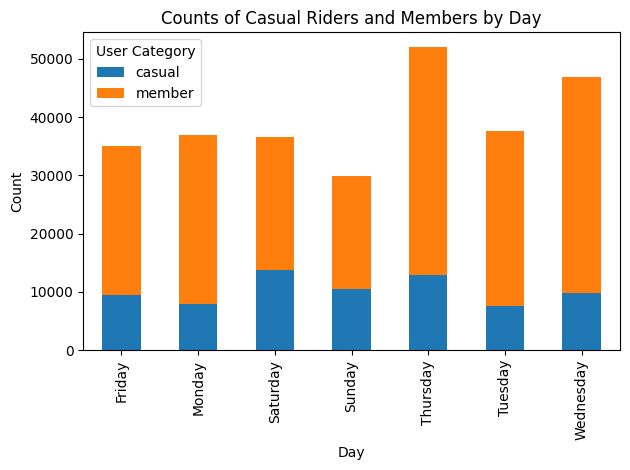

member_casual  casual  member
day                          
Friday           9482   25594
Monday           7961   28933
Saturday        13802   22704
Sunday          10451   19451
Thursday        12959   38983
Tuesday          7577   29959
Wednesday        9865   37077


In [73]:
plt.figure(figsize=(10, 6))

df2.groupby(['day', 'member_casual']).size().unstack().plot(kind='bar', stacked=True)


plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Counts of Casual Riders and Members by Day')

plt.legend(title='User Category')
plt.tight_layout()
plt.show()
print(df2.groupby(['day', 'member_casual']).size().unstack())

Saturday & thursday is the busiest day for casual riders and wednesday & thursday is the busiest day for members. On the contrary, sunday & saturday is the least busy day for members and monday & tuesday is the least busy day for casual riders


- Members seem to not use the service on weekends while casual riders mostly use the service on weekends.
- Probably because members use the service to commute to work and casual riders use it just for recreation.

<Figure size 1000x600 with 0 Axes>

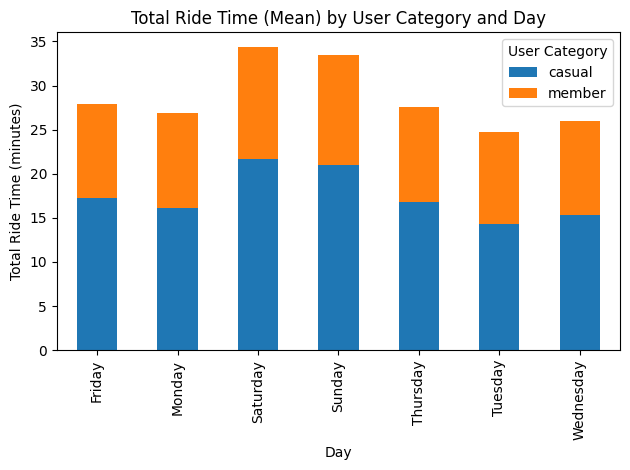

member_casual                    casual                    member
day                                                              
Friday        0 days 00:17:16.310693946 0 days 00:10:36.245252793
Monday        0 days 00:16:10.415023238 0 days 00:10:43.322158089
Saturday      0 days 00:21:41.050572380 0 days 00:12:37.780919661
Sunday        0 days 00:20:56.866232896 0 days 00:12:32.512415814
Thursday      0 days 00:16:49.500810247 0 days 00:10:47.685580894
Tuesday       0 days 00:14:21.212353174 0 days 00:10:20.701759070
Wednesday     0 days 00:15:16.827166751 0 days 00:10:42.524341235


In [74]:
ridetime_mean = df2.groupby(['day', 'member_casual'])['total_ride_time'].mean().unstack()

total_ride_time_minutes = ridetime_mean / pd.Timedelta(minutes=1)


plt.figure(figsize=(10, 6))

total_ride_time_minutes.plot(kind='bar', stacked=True)

plt.xlabel('Day')
plt.ylabel('Total Ride Time (minutes)')
plt.title('Total Ride Time (Mean) by User Category and Day')


plt.legend(title='User Category')
plt.tight_layout()
plt.show()


print(ridetime_mean)

The highest average ride time is on saturday and sunday for both. Not shocking, because unlike on weekdays, they are not rushed by time. For weekends the highest is thursday